In [1]:
import numpy as np
import pandas
import os
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats import gaussian_kde
import torch
import sys
from tqdm import tqdm
import h5py

# Set up path to import from src
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.append(src_path)

# Import pokie from pokie.py
from pokie import pokie, pokie_bootstrap, get_device

In [2]:
# Ground Truth Data
Truth_Data_epl_multiple_sersic_sources_hdf5 = h5py.File('/Users/sammysharief/Downloads/Lensing_Pokie/Lens_Data/Experiment_1/EPL_Multiple_Serseic_Sources.hdf5', 'r')
Truth_Data_epl_multiple_sersic_sources = Truth_Data_epl_multiple_sersic_sources_hdf5['EPL_Multiple_Serseic_Sources'][0:100]

# Truth_Data_epl_multiple_sersic_sources_hdf5 = h5py.File('/Users/sammysharief/Downloads/Lensing_Pokie/Lens_Data/Experiment_2/EPL_Multiple_Serseic_Sources.hdf5', 'r')
# Truth_Data_epl_multiple_sersic_sources = Truth_Data_epl_multiple_sersic_sources_hdf5['EPL_Multiple_Serseic_Sources'][0:100]

# Truth_Data_epl_multiple_sersic_sources_hdf5 = h5py.File('/Users/sammysharief/Downloads/Lensing_Pokie/Lens_Data/Experiment_2/EPL_Multiple_Serseic_Sources.hdf5', 'r')
# Truth_Data_epl_multiple_sersic_sources = Truth_Data_epl_multiple_sersic_sources_hdf5['EPL_Multiple_Serseic_Sources'][0:100]

# Truth_Data_epl_multiple_sersic_sources_hdf5 = h5py.File('/Users/sammysharief/Downloads/Lensing_Pokie/Lens_Data/Experiment_4/EPL_Multiple_Serseic_Sources_V1.hdf5', 'r')
# Truth_Data_epl_multiple_sersic_sources = Truth_Data_epl_multiple_sersic_sources_hdf5['EPL_Multiple_Serseic_Sources_V1'][0:100]

In [3]:
# Experiment 1 Data
experiment_1_sie_multiple_sersic_sources_hdf5 = h5py.File('/Users/sammysharief/Downloads/Lensing_Pokie/Lens_Data/Experiment_1/SIE_Multiple_Serseic_Sources.hdf5', 'r')
experiment_2_sie_1_sersic_sources_hdf5 = h5py.File('/Users/sammysharief/Downloads/Lensing_Pokie/Lens_Data/Experiment_2/SIE_1_Serseic_Sources.hdf5', 'r')
experiment_3_epl_1_sersic_sources_hdf5 = h5py.File('/Users/sammysharief/Downloads/Lensing_Pokie/Lens_Data/Experiment_3/EPL_1_Serseic_Sources.hdf5', 'r')
experiment_4_epl_multiple_sersic_sources_v2_hdf5 = h5py.File('/Users/sammysharief/Downloads/Lensing_Pokie/Lens_Data/Experiment_4/EPL_Multiple_Serseic_Sources_V2.hdf5', 'r')

experiment_1_sie_multiple_sersic_sources = experiment_1_sie_multiple_sersic_sources_hdf5['SIE_Multiple_Serseic_Sources']
experiment_2_sie_1_sersic_sources = experiment_2_sie_1_sersic_sources_hdf5['SIE_1_Serseic_Sources']
experiment_3_epl_1_sersic_sources = experiment_3_epl_1_sersic_sources_hdf5['EPL_1_Serseic_Sources']
experiment_4_epl_multiple_sersic_sources_v2 = experiment_4_epl_multiple_sersic_sources_v2_hdf5['EPL_Multiple_Serseic_Sources_V2']

In [4]:
# Print Shapes of the datasets
print("Truth Data EPL Multiple Sersic Sources Shape: ", Truth_Data_epl_multiple_sersic_sources.shape)
print("Experiment 1 SIE Multiple Sersic Sources Shape: ", experiment_1_sie_multiple_sersic_sources.shape)
print("Experiment 2 SIE 1 Sersic Sources Shape: ", experiment_2_sie_1_sersic_sources.shape)
print("Experiment 3 EPL 1 Sersic Sources Shape: ", experiment_3_epl_1_sersic_sources.shape)
print("Experiment 4 EPL Multiple Sersic Sources V2 Shape: ", experiment_4_epl_multiple_sersic_sources_v2.shape)

Truth Data EPL Multiple Sersic Sources Shape:  (100, 32, 32)
Experiment 1 SIE Multiple Sersic Sources Shape:  (100000, 32, 32)
Experiment 2 SIE 1 Sersic Sources Shape:  (100000, 32, 32)
Experiment 3 EPL 1 Sersic Sources Shape:  (100000, 32, 32)
Experiment 4 EPL Multiple Sersic Sources V2 Shape:  (100000, 32, 32)


In [5]:
# Normalize the Data
truth_max = np.max(Truth_Data_epl_multiple_sersic_sources)
truth_min = np.min(Truth_Data_epl_multiple_sersic_sources)

Truth_Data_epl_multiple_sersic_sources = (Truth_Data_epl_multiple_sersic_sources - truth_min) / (truth_max - truth_min + 1e-10)
experiment_1_sie_multiple_sersic_sources = (experiment_1_sie_multiple_sersic_sources - truth_min) / (truth_max - truth_min + 1e-10)
experiment_2_sie_1_sersic_sources = (experiment_2_sie_1_sersic_sources - truth_min) / (truth_max - truth_min + 1e-10)
experiment_3_epl_1_sersic_sources = (experiment_3_epl_1_sersic_sources - truth_min) / (truth_max - truth_min + 1e-10)
experiment_4_epl_multiple_sersic_sources_v2 = (experiment_4_epl_multiple_sersic_sources_v2 - truth_min) / (truth_max - truth_min + 1e-10)

# Print Min and Max of the datasets
print("Truth Data EPL Multiple Sersic Sources Min: ", np.min(Truth_Data_epl_multiple_sersic_sources))
print("Truth Data EPL Multiple Sersic Sources Max: ", np.max(Truth_Data_epl_multiple_sersic_sources))
print("Experiment 1 SIE Multiple Sersic Sources Min: ", np.min(experiment_1_sie_multiple_sersic_sources))
print("Experiment 1 SIE Multiple Sersic Sources Max: ", np.max(experiment_1_sie_multiple_sersic_sources))
print("Experiment 2 SIE 1 Sersic Sources Min: ", np.min(experiment_2_sie_1_sersic_sources))
print("Experiment 2 SIE 1 Sersic Sources Max: ", np.max(experiment_2_sie_1_sersic_sources))
print("Experiment 3 EPL 1 Sersic Sources Min: ", np.min(experiment_3_epl_1_sersic_sources))
print("Experiment 3 EPL 1 Sersic Sources Max: ", np.max(experiment_3_epl_1_sersic_sources))
print("Experiment 4 EPL Multiple Sersic Sources V2 Min: ", np.min(experiment_4_epl_multiple_sersic_sources_v2))
print("Experiment 4 EPL Multiple Sersic Sources V2 Max: ", np.max(experiment_4_epl_multiple_sersic_sources_v2))

Truth Data EPL Multiple Sersic Sources Min:  0.0
Truth Data EPL Multiple Sersic Sources Max:  1.0
Experiment 1 SIE Multiple Sersic Sources Min:  -0.010352028
Experiment 1 SIE Multiple Sersic Sources Max:  4.6473546
Experiment 2 SIE 1 Sersic Sources Min:  -0.007940476
Experiment 2 SIE 1 Sersic Sources Max:  20.954033
Experiment 3 EPL 1 Sersic Sources Min:  -0.009734435
Experiment 3 EPL 1 Sersic Sources Max:  14.2620945
Experiment 4 EPL Multiple Sersic Sources V2 Min:  -0.009058025
Experiment 4 EPL Multiple Sersic Sources V2 Max:  2.6953504


In [6]:
# Reshape the datasets from (1000, 32, 32) to (1000, 32*32)
Truth_Data_epl_multiple_sersic_sources = Truth_Data_epl_multiple_sersic_sources.reshape(Truth_Data_epl_multiple_sersic_sources.shape[0], -1)
experiment_1_sie_multiple_sersic_sources = experiment_1_sie_multiple_sersic_sources.reshape(experiment_1_sie_multiple_sersic_sources.shape[0], -1)
experiment_2_sie_1_sersic_sources = experiment_2_sie_1_sersic_sources.reshape(experiment_2_sie_1_sersic_sources.shape[0], -1)
experiment_3_epl_1_sersic_sources = experiment_3_epl_1_sersic_sources.reshape(experiment_3_epl_1_sersic_sources.shape[0], -1)
experiment_4_epl_multiple_sersic_sources_v2 = experiment_4_epl_multiple_sersic_sources_v2.reshape(experiment_4_epl_multiple_sersic_sources_v2.shape[0], -1)
# Print Shapes of the reshaped datasets
print("Truth Data EPL Multiple Sersic Sources Reshaped Shape: ", Truth_Data_epl_multiple_sersic_sources.shape)
print("Experiment 1 SIE Multiple Sersic Sources Reshaped Shape: ", experiment_1_sie_multiple_sersic_sources.shape)
print("Experiment 2 SIE 1 Sersic Sources Reshaped Shape: ", experiment_2_sie_1_sersic_sources.shape)
print("Experiment 3 EPL 1 Sersic Sources Reshaped Shape: ", experiment_3_epl_1_sersic_sources.shape)
print("Experiment 4 EPL Multiple Sersic Sources V2 Reshaped Shape: ", experiment_4_epl_multiple_sersic_sources_v2.shape)

Truth Data EPL Multiple Sersic Sources Reshaped Shape:  (100, 1024)
Experiment 1 SIE Multiple Sersic Sources Reshaped Shape:  (100000, 1024)
Experiment 2 SIE 1 Sersic Sources Reshaped Shape:  (100000, 1024)
Experiment 3 EPL 1 Sersic Sources Reshaped Shape:  (100000, 1024)
Experiment 4 EPL Multiple Sersic Sources V2 Reshaped Shape:  (100000, 1024)


In [7]:
posterior = [experiment_1_sie_multiple_sersic_sources, experiment_2_sie_1_sersic_sources, experiment_3_epl_1_sersic_sources, experiment_4_epl_multiple_sersic_sources_v2]
# posterior = [experiment_1_sie_multiple_sersic_sources, experiment_2_sie_1_sersic_sources, experiment_3_epl_1_sersic_sources]

truth = Truth_Data_epl_multiple_sersic_sources 

posterior = np.array(posterior) # 4, 100000, 32*32
truth = np.array(truth) # 100, 32*32

n_models, n_samples, img_size = posterior.shape
n_truths = truth.shape[0]
samples_per_truth = n_samples // n_truths

posterior = posterior.reshape(n_models, n_truths, samples_per_truth, img_size)

print("Posterior Shape: ", posterior.shape)
print("Truth Shape: ", truth.shape)

Posterior Shape:  (4, 100, 1000, 1024)
Truth Shape:  (100, 1024)


In [8]:
'''
Modify Posterior as follows:
Currently it is (Models, Samples, 32*32)
What we now want is (Models, Num Ground Truuths, Per Each Ground Truth 100 Samples, 32*32)
'''


'\nModify Posterior as follows:\nCurrently it is (Models, Samples, 32*32)\nWhat we now want is (Models, Num Ground Truuths, Per Each Ground Truth 100 Samples, 32*32)\n'

With this Data, 1000 Images in 32 x 32, It will take 2 Hours and 45 Minutes to run POKIE with 100 runs. With 100 Samples, it only takes 10 seconds so it's a question of how many samples are actually needed

Two things
1. Optimize CPU version of Pokie
2. GPU Compatiable Pokie --> Run on mps via Torch aka Apple GPU

In [9]:
# -------------------------------
# Pokie Evaluation
# -------------------------------
device = get_device()
print("Using device:", device)

# Convert to torch Tensors on the chosen device
posterior   = torch.tensor(posterior, dtype=torch.float32, device=device)
truth = torch.tensor(truth,   dtype=torch.float32, device=device)


results, calibrated, n_over_N_vals = pokie(
    truth, posterior, num_runs=100
)

# Convert results, calibrated, n_over_N_vals back to numpy arrays
results = results.cpu().numpy()
calibrated = calibrated.cpu().numpy()
n_over_N_vals = n_over_N_vals.cpu().numpy()

l_values = np.linspace(0, len(results) - 1, len(results))
l_values = np.array(l_values)

print("Model:", l_values)
print("Raw Pokie:", results)
print("Calibrated Pokie:", calibrated)

Using device: mps


Pokie MC runs: 100%|██████████| 100/100 [00:23<00:00,  4.19it/s]


Model: [0. 1. 2. 3.]
Raw Pokie: [0.22447562 0.2557835  0.265336   0.25440484]
Calibrated Pokie: [0.58573526 0.66742843 0.69235426 0.663831  ]


In [10]:
# results, calibrated, n_over_N_vals = pokie(truth, posterior, num_runs=100)
# print(f'Results: {results}')
# print(f'Calibration: {calibrated}')

Ideas
- Each Exp has Varying Parameters. Fix this to be the middle of their ranges and reun

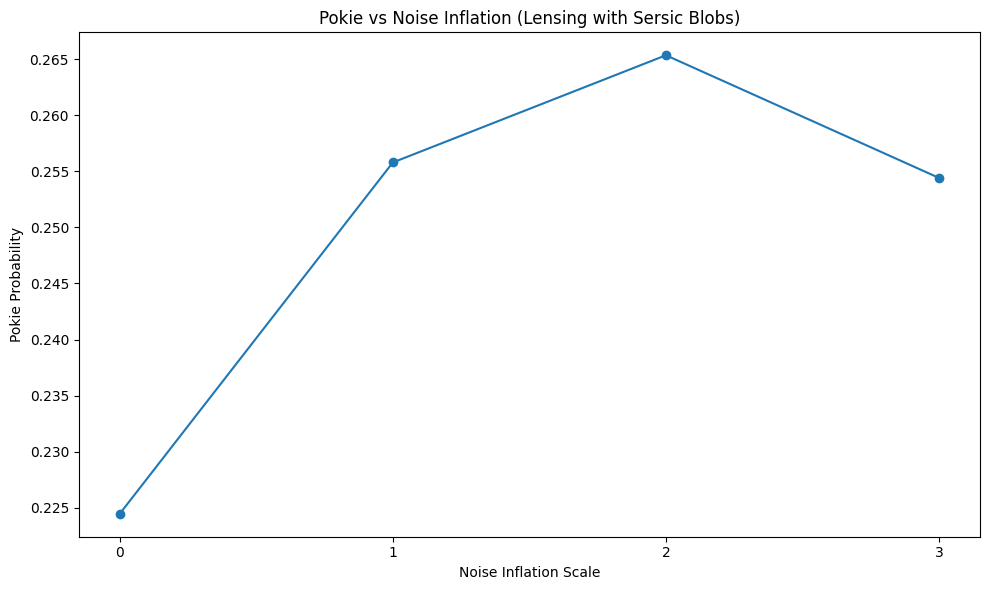

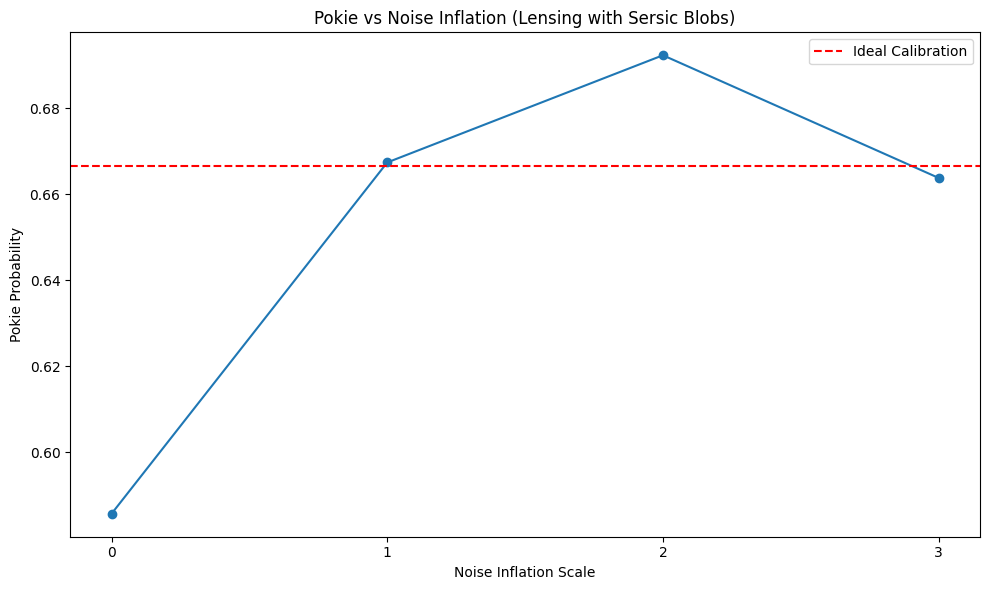

In [11]:


# Plot Pokie vs noise level
plt.figure(figsize=(10, 6))
plt.plot(l_values, results, marker='o')
plt.xlabel('Noise Inflation Scale')
plt.ylabel('Pokie Probability')
plt.title('Pokie vs Noise Inflation (Lensing with Sersic Blobs)')
plt.xticks(l_values)
plt.tight_layout()
plt.savefig("../PLots/Gravitational_Lensing_Experiment/Pokie_Leansing_Serseic_Images.pdf")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(l_values, calibrated, marker='o')
plt.xlabel('Noise Inflation Scale')
plt.ylabel('Pokie Probability')
plt.title('Pokie vs Noise Inflation (Lensing with Sersic Blobs)')
plt.axhline(y=2/3, color='r', linestyle='--', label='Ideal Calibration')
plt.legend()
plt.xticks(l_values)
plt.tight_layout()
plt.savefig("../PLots/Gravitational_Lensing_Experiment/Pokie_Leansing_Serseic_Calibrated.pdf")
plt.show()

# # Histogram of n/N values
# plt.figure(figsize=(10, 6))
# plt.hist(n_over_N_vals, bins=30, density=True, alpha=0.7)
# plt.title(r"Distribution of $\frac{n}{N}$ (Gaussian Conjugate Model)")
# plt.xlabel(r"$\frac{n}{N}$")
# plt.ylabel("Density")
# plt.tight_layout()
# plt.savefig("../PLots/Gravitational_Lensing_Experiment/Pokie_n_over_N_Leansing_Serseic_Images.pdf")
# plt.show()

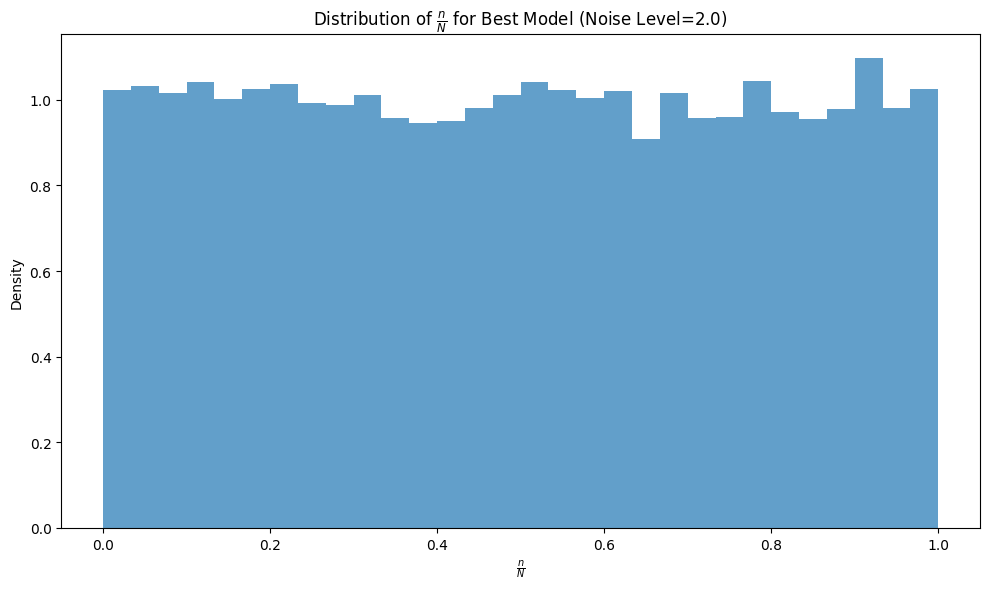

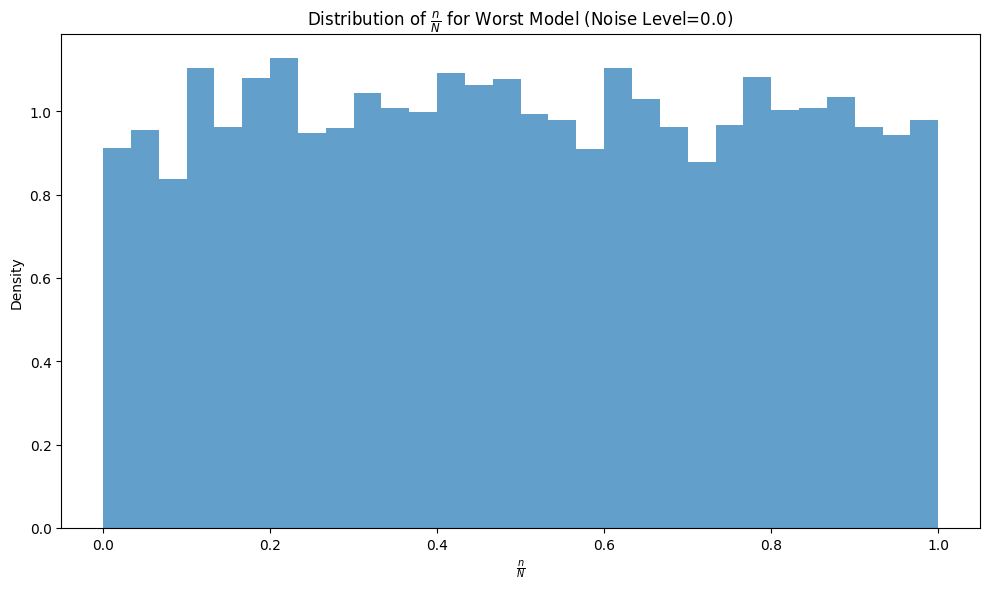

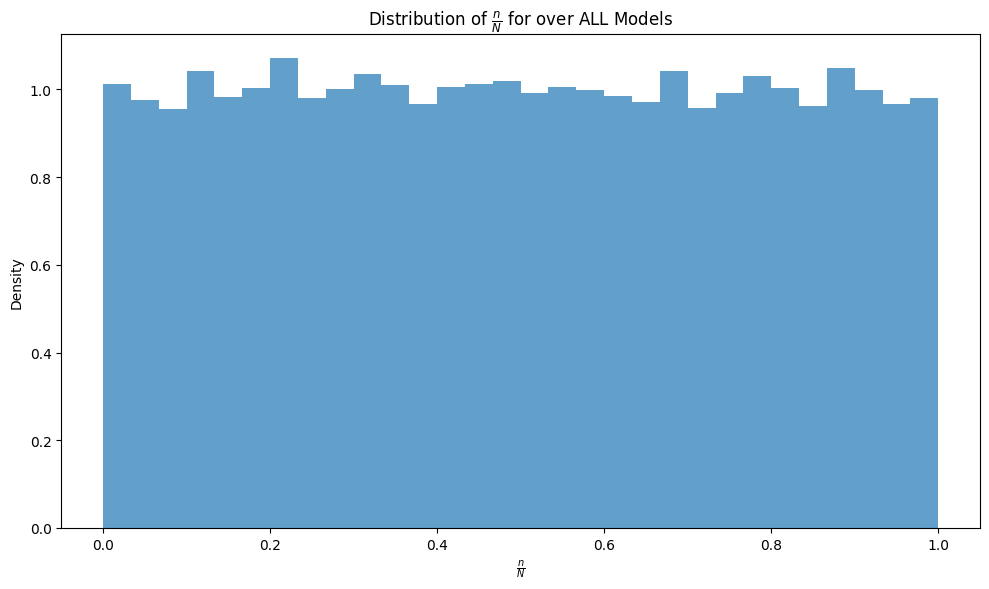

In [12]:
# Identify the best model
best_model_idx = np.argmax(results)

# Extract its n/N values across all runs and all truths, then flatten
# n_over_N_vals has shape (n_runs, n_models, n_truths)
best_vals = n_over_N_vals[:, best_model_idx, :].reshape(-1)

# Plot the distribution of n/N values for the best model
plt.figure(figsize=(10, 6))
plt.hist(best_vals, bins=30, density=True, alpha=0.7)
plt.title(rf"Distribution of $\frac{{n}}{{N}}$ for Best Model (Noise Level={l_values[best_model_idx]})")
plt.xlabel(r"$\frac{n}{N}$")
plt.ylabel("Density")
plt.tight_layout()
plt.savefig("../PLots/Gravitational_Lensing_Experiment/Pokie_Best_Model_n_over_N_Leansing_Serseic_Images.pdf")
plt.show()

# Identify the Worst Model
worst_model_idx = np.argmin(results)

# Extract its n/N values across all runs and all truths, then flatten
# n_over_N_vals has shape (n_runs, n_models, n_truths)
worst_vals = n_over_N_vals[:, worst_model_idx, :].reshape(-1)

# Plot the distribution of n/N values for the worst model
plt.figure(figsize=(10, 6))
plt.hist(worst_vals, bins=30, density=True, alpha=0.7)
plt.title(rf"Distribution of $\frac{{n}}{{N}}$ for Worst Model (Noise Level={l_values[worst_model_idx]})")
plt.xlabel(r"$\frac{n}{N}$")
plt.ylabel("Density")
plt.tight_layout()
plt.savefig("../PLots/Gravitational_Lensing_Experiment/Pokie_Worst_Model_n_over_N_Leansing_Serseic_Images.pdf")
plt.show()

# Concat all n/N values across all models
all_vals = n_over_N_vals.reshape(-1)

# Plot the distribution of n/N values for the worst model
plt.figure(figsize=(10, 6))
plt.hist(all_vals, bins=30, density=True, alpha=0.7)
plt.title(rf"Distribution of $\frac{{n}}{{N}}$ for over ALL Models")
plt.xlabel(r"$\frac{n}{N}$")
plt.ylabel("Density")
plt.tight_layout()
plt.savefig("../PLots/Gravitational_Lensing_Experiment/Pokie_n_over_N_Leansing_Serseic_Images.pdf")
plt.show()

In [13]:
Truth_Data_epl_multiple_sersic_sources_hdf5.close()
experiment_1_sie_multiple_sersic_sources_hdf5.close()
experiment_2_sie_1_sersic_sources_hdf5.close()
experiment_3_epl_1_sersic_sources_hdf5.close()
experiment_4_epl_multiple_sersic_sources_v2_hdf5.close()